# 🫀 Heart Disease Dataset - Exploratory Data Analysis (EDA)

This notebook explores the **heart.csv** dataset. We analyze patient health indicators to understand patterns and correlations with heart disease.

**Target:** `HeartDisease` — whether the patient has heart disease or not.

#### Life cycle of Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis

### 1) Problem statement
- This project investigates how various medical and lifestyle variables such as age, sex, cholesterol, chest pain type, and exercise-induced angina relate to the presence of heart disease in patients.

- The goal is to explore the dataset to uncover insights, identify important predictors, and understand trends that may assist in early detection of heart disease.


### 2) Data Collection
- Dataset Source: Kaggle - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

- The dataset contains 918 rows and 12 columns.

- Each row represents a patient’s clinical information, and the target column HeartDisease indicates the diagnosis (1 = disease, 0 = no disease).

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
!pip install seaborn
!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
%pwd

'a:\\mlflow\\Heart-Failure-Prediction-with-Machine-Learning-MLflow\\research'

In [5]:
os.chdir("../")

#### Import the CSV Data as Pandas DataFrame

In [6]:
# Load the dataset
df = pd.read_csv('artifacts/data_ingestion/heart.csv')


In [17]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
df.shape

(918, 12)

### 2.2 Dataset information

- Age : Age of the patient → (Numerical: e.g., 29, 54, 65)
- Sex : Gender of the patient → (Male / Female)
- ChestPainType : Type of chest pain experienced → (ATA, NAP, ASY, TA)

    ATA: Atypical angina

    NAP: Non-anginal pain

    ASY: Asymptomatic

    TA: Typical angina
    

- RestingBP : Resting blood pressure (in mm Hg) → (Numerical
- Cholesterol : Serum cholesterol (in mg/dl) → (Numerical)
- FastingBS : Fasting blood sugar > 120 mg/dl → (0 = No, 1 = Yes)
- RestingECG : Results of resting electrocardiogram → (Normal, ST, LVH)

    ST: Having ST-T wave abnormality

    LVH: Left ventricular hypertrophy

    MaxHR : Maximum heart rate achieved → (Numerical)
    

- ExerciseAngina : Exercise-induced angina → (Y = Yes, N = No)
- Oldpeak : ST depression induced by exercise relative to rest → (Numerical, float)
- ST_Slope : The slope of the peak exercise ST segment → (Up, Flat, Down)
- HeartDisease : Target variable → (1 = Presence of heart disease, 0 = Absence of heart disease)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [21]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### 3.2 Check Duplicates

In [20]:
df.duplicated().sum()

0

### 3.3 Check data types

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 3.4 Checking the number of unique values of each column

In [23]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### 3.5 Check statistics of data set

In [11]:
# Summary statistics
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


- From the above description of numerical data, the mean age of patients is around 53.5 years, with a fairly wide age range from 28 to 77 years, indicating patients from young adults to elderly are included.
- The Resting Blood Pressure (RestingBP) shows a mean of 132.4 mm Hg, but the minimum value is 0, which is physiologically incorrect and likely an error or placeholder for missing data.
- Cholesterol also has a minimum of 0 mg/dL, which again suggests missing or erroneous values, despite having a mean of nearly 199 mg/dL and a maximum of 603 mg/dL.
- For Fasting Blood Sugar, the average is 0.23, showing that most patients did not have elevated fasting blood sugar (>120 mg/dL).
- The maximum heart rate (MaxHR) achieved has a mean of 136.8 bpm, with a wide range from 60 to 202 bpm, indicating good variation in physical response during stress.
- Oldpeak, which measures ST depression, has values ranging from -2.6 to 6.2, with a mean of 0.89. The negative minimum is unusual and may need verification.
- The target variable (HeartDisease) has a mean of 0.553, meaning approximately 55.3% of the patients in the dataset have heart disease — showing a slight class imbalance.



### 3.6 Exploring Data

In [24]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [25]:
print("Categories in 'Sex' variable:               ", end=" ")
print(df['Sex'].unique())

print("Categories in 'ChestPainType' variable:     ", end=" ")
print(df['ChestPainType'].unique())

print("Categories in 'RestingECG' variable:        ", end=" ")
print(df['RestingECG'].unique())

print("Categories in 'ExerciseAngina' variable:    ", end=" ")
print(df['ExerciseAngina'].unique())

print("Categories in 'ST_Slope' variable:          ", end=" ")
print(df['ST_Slope'].unique())


Categories in 'Sex' variable:                ['M' 'F']
Categories in 'ChestPainType' variable:      ['ATA' 'NAP' 'ASY' 'TA']
Categories in 'RestingECG' variable:         ['Normal' 'ST' 'LVH']
Categories in 'ExerciseAngina' variable:     ['N' 'Y']
Categories in 'ST_Slope' variable:           ['Up' 'Flat' 'Down']


In [26]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 7 numerical features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

We have 5 categorical features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [27]:
# Equivalent conditional checks for heart.csv dataset
high_heart_rate = df[df['MaxHR'] >= 200]['MaxHR'].count()
zero_bp = df[df['RestingBP'] == 0]['RestingBP'].count()
zero_cholesterol = df[df['Cholesterol'] == 0]['Cholesterol'].count()

print(f'Number of patients with MaxHR ≥ 200: {high_heart_rate}')
print(f'Number of patients with RestingBP = 0: {zero_bp}')
print(f'Number of patients with Cholesterol = 0: {zero_cholesterol}')


Number of patients with MaxHR ≥ 200: 1
Number of patients with RestingBP = 0: 1
Number of patients with Cholesterol = 0: 172


In [28]:
# Patients with very low Maximum Heart Rate (≤ 90 bpm) — may indicate poor cardiovascular fitness
low_maxhr = df[df['MaxHR'] <= 90]['MaxHR'].count()

# Patients with very high Oldpeak (≥ 4) — can indicate serious ST depression
high_oldpeak = df[df['Oldpeak'] >= 4]['Oldpeak'].count()

# Patients with critically high Cholesterol (≥ 300 mg/dL)
high_cholesterol = df[df['Cholesterol'] >= 300]['Cholesterol'].count()

print(f'Number of patients with MaxHR ≤ 90: {low_maxhr}')
print(f'Number of patients with Oldpeak ≥ 4: {high_oldpeak}')
print(f'Number of patients with Cholesterol ≥ 300: {high_cholesterol}')


Number of patients with MaxHR ≤ 90: 30
Number of patients with Oldpeak ≥ 4: 14
Number of patients with Cholesterol ≥ 300: 105


#####  Insights
- From the above values, we observe that a significant number of patients have extremely high cholesterol levels (≥ 300 mg/dL) — indicating a strong risk factor for heart disease.
- A portion of patients have low maximum heart rates (≤ 90 bpm), which could point to reduced physical fitness or possible cardiac conditions.
- Several patients show high Oldpeak values (≥ 4), suggesting significant ST depression, which may indicate ischemia or abnormal stress test results.

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

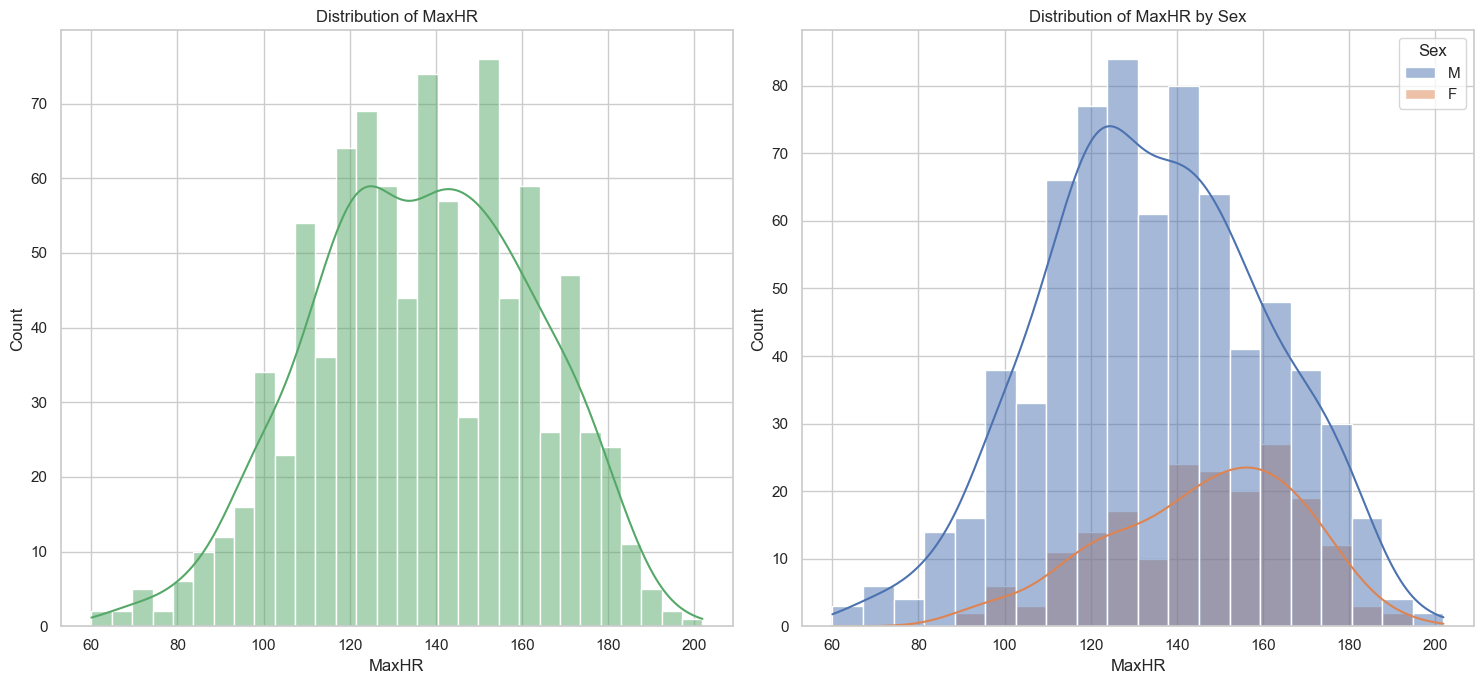

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Overall distribution of MaxHR
plt.subplot(121)
sns.histplot(data=df, x='MaxHR', bins=30, kde=True, color='g')
plt.title("Distribution of MaxHR")

# Gender-wise distribution of MaxHR
plt.subplot(122)
sns.histplot(data=df, x='MaxHR', kde=True, hue='Sex')
plt.title("Distribution of MaxHR by Sex")

plt.tight_layout()
plt.show()


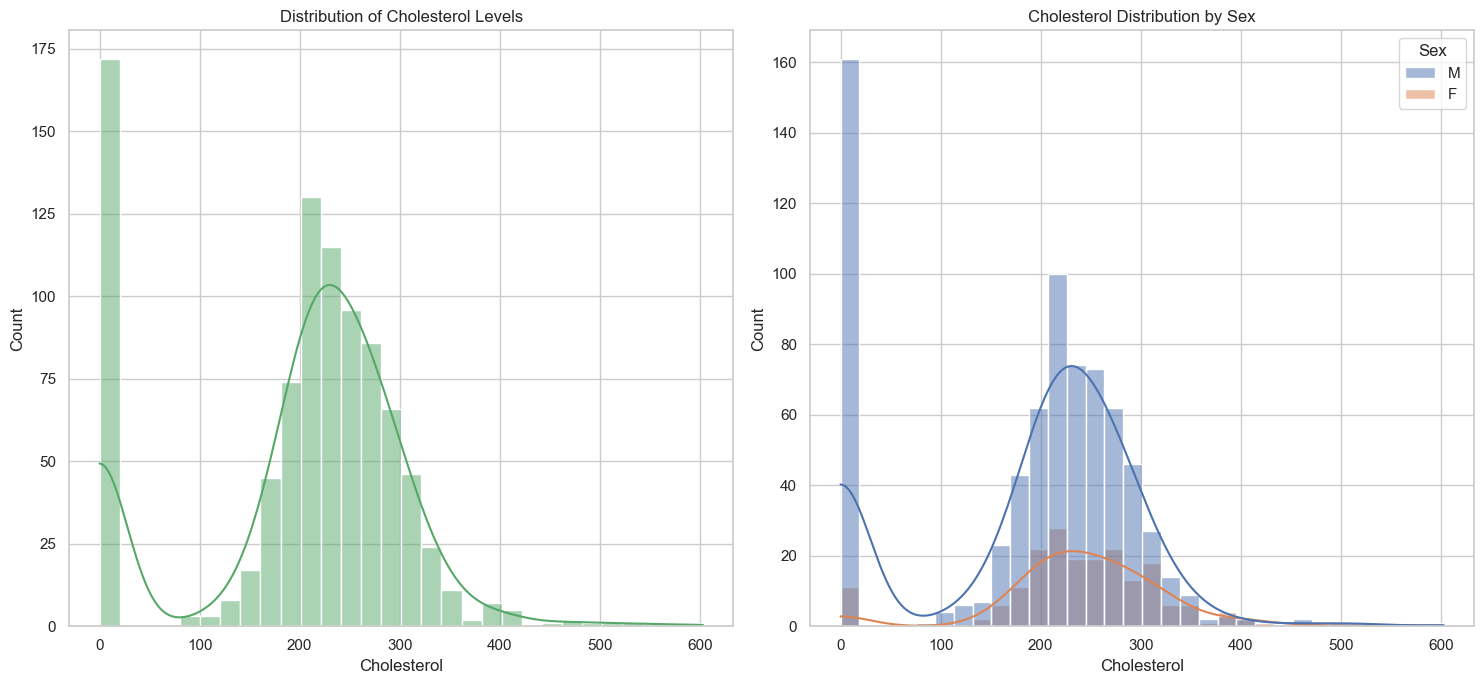

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Overall Cholesterol distribution
plt.subplot(121)
sns.histplot(data=df, x='Cholesterol', bins=30, kde=True, color='g')
plt.title("Distribution of Cholesterol Levels")

# Cholesterol distribution by Sex
plt.subplot(122)
sns.histplot(data=df, x='Cholesterol', kde=True, hue='Sex')
plt.title("Cholesterol Distribution by Sex")

plt.tight_layout()
plt.show()


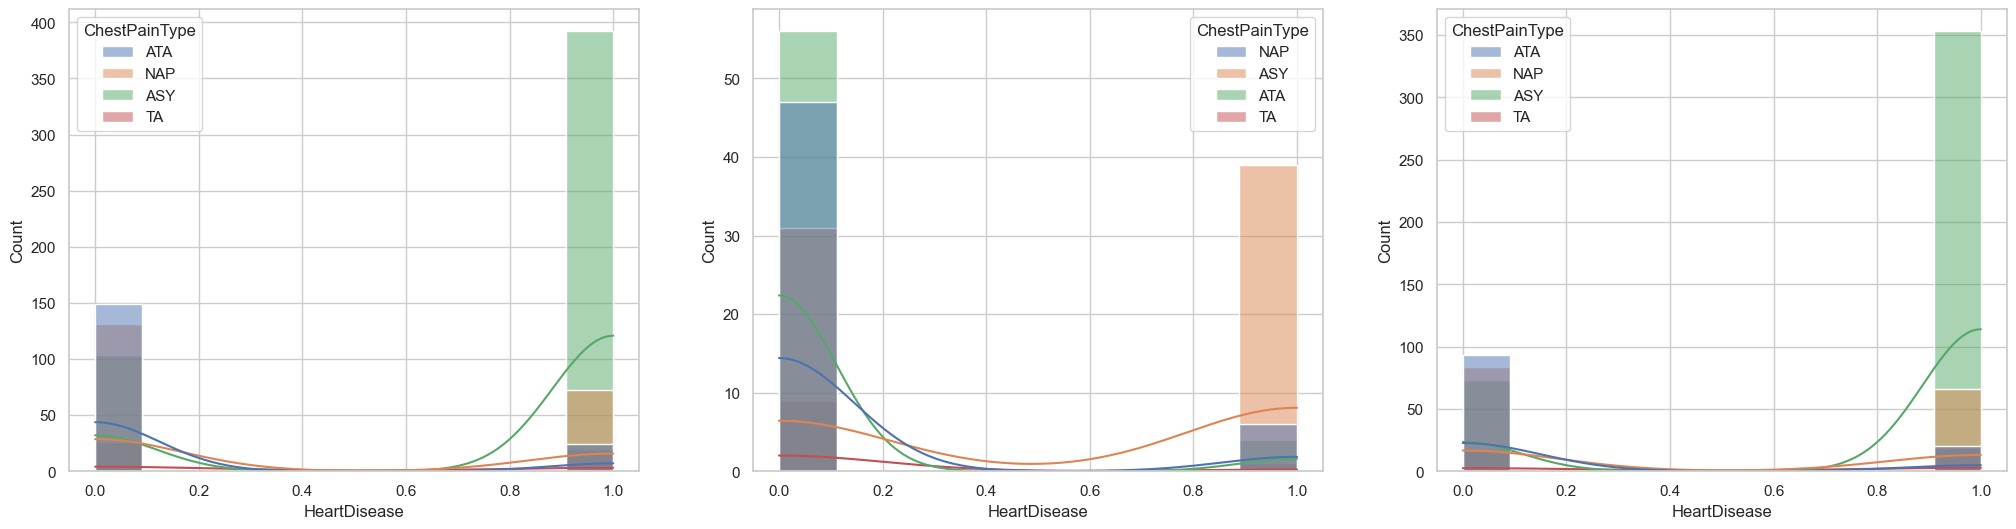

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='HeartDisease',kde=True,hue='ChestPainType')
plt.subplot(132)
sns.histplot(data=df[df.Sex=='F'],x='HeartDisease',kde=True,hue='ChestPainType')
plt.subplot(133)
sns.histplot(data=df[df.Sex=='M'],x='HeartDisease',kde=True,hue='ChestPainType')
plt.show()

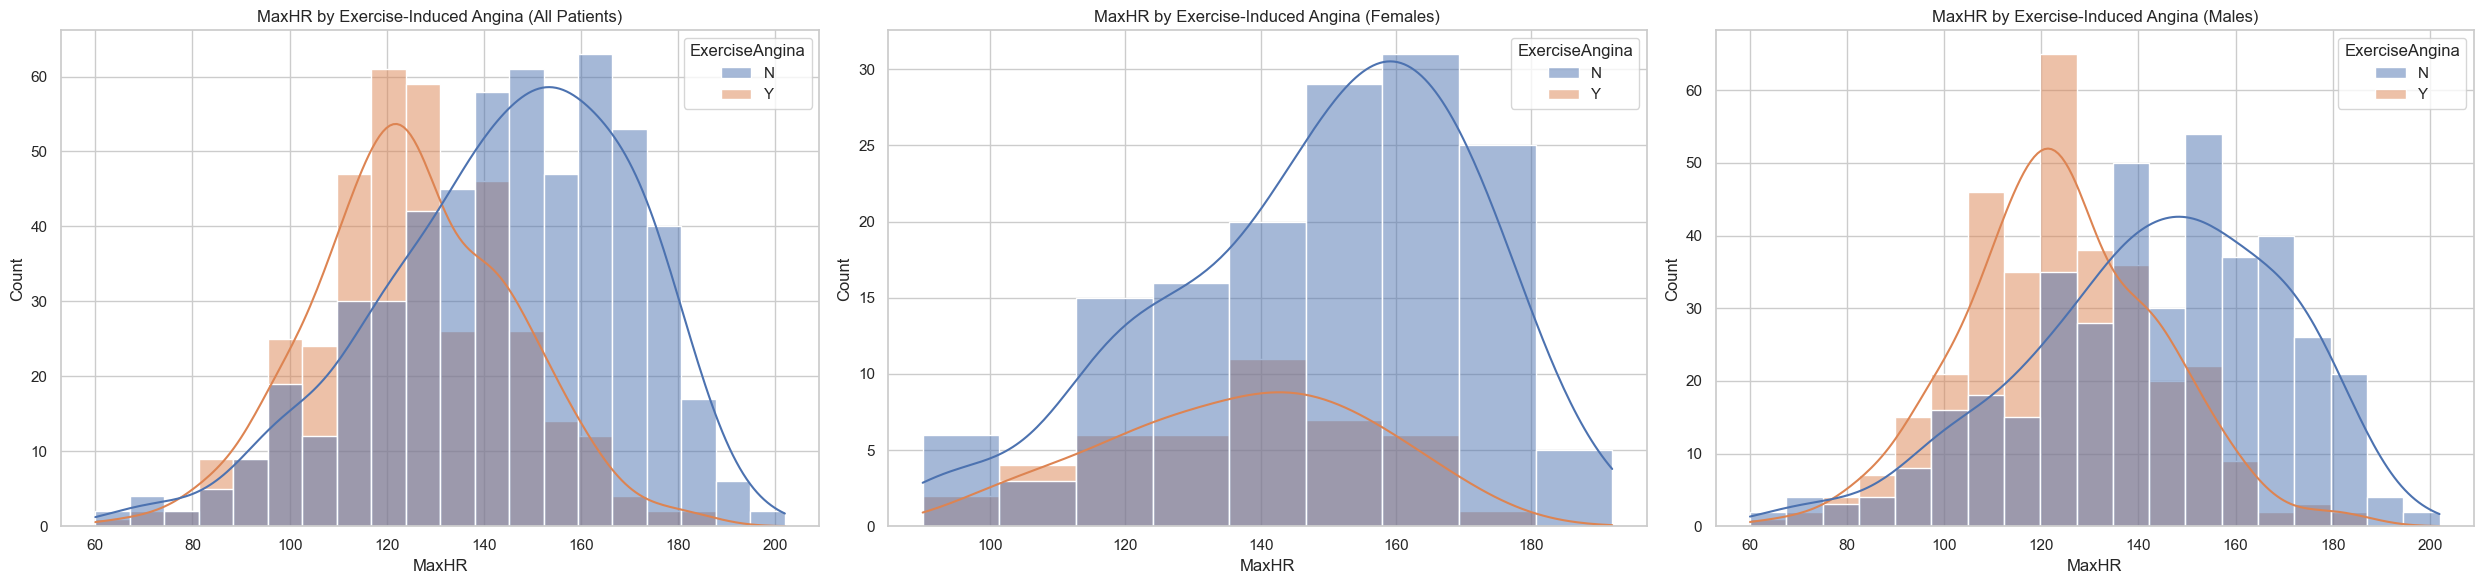

In [7]:
plt.subplots(1, 3, figsize=(25, 6))

# Plot 1: Overall MaxHR by ExerciseAngina
plt.subplot(131)
sns.histplot(data=df, x='MaxHR', kde=True, hue='ExerciseAngina')
plt.title("MaxHR by Exercise-Induced Angina (All Patients)")

# Plot 2: MaxHR by ExerciseAngina for Females
plt.subplot(132)
sns.histplot(data=df[df.Sex == 'F'], x='MaxHR', kde=True, hue='ExerciseAngina')
plt.title("MaxHR by Exercise-Induced Angina (Females)")

# Plot 3: MaxHR by ExerciseAngina for Males
plt.subplot(133)
sns.histplot(data=df[df.Sex == 'M'], x='MaxHR', kde=True, hue='ExerciseAngina')
plt.title("MaxHR by Exercise-Induced Angina (Males)")

plt.tight_layout()
plt.show()


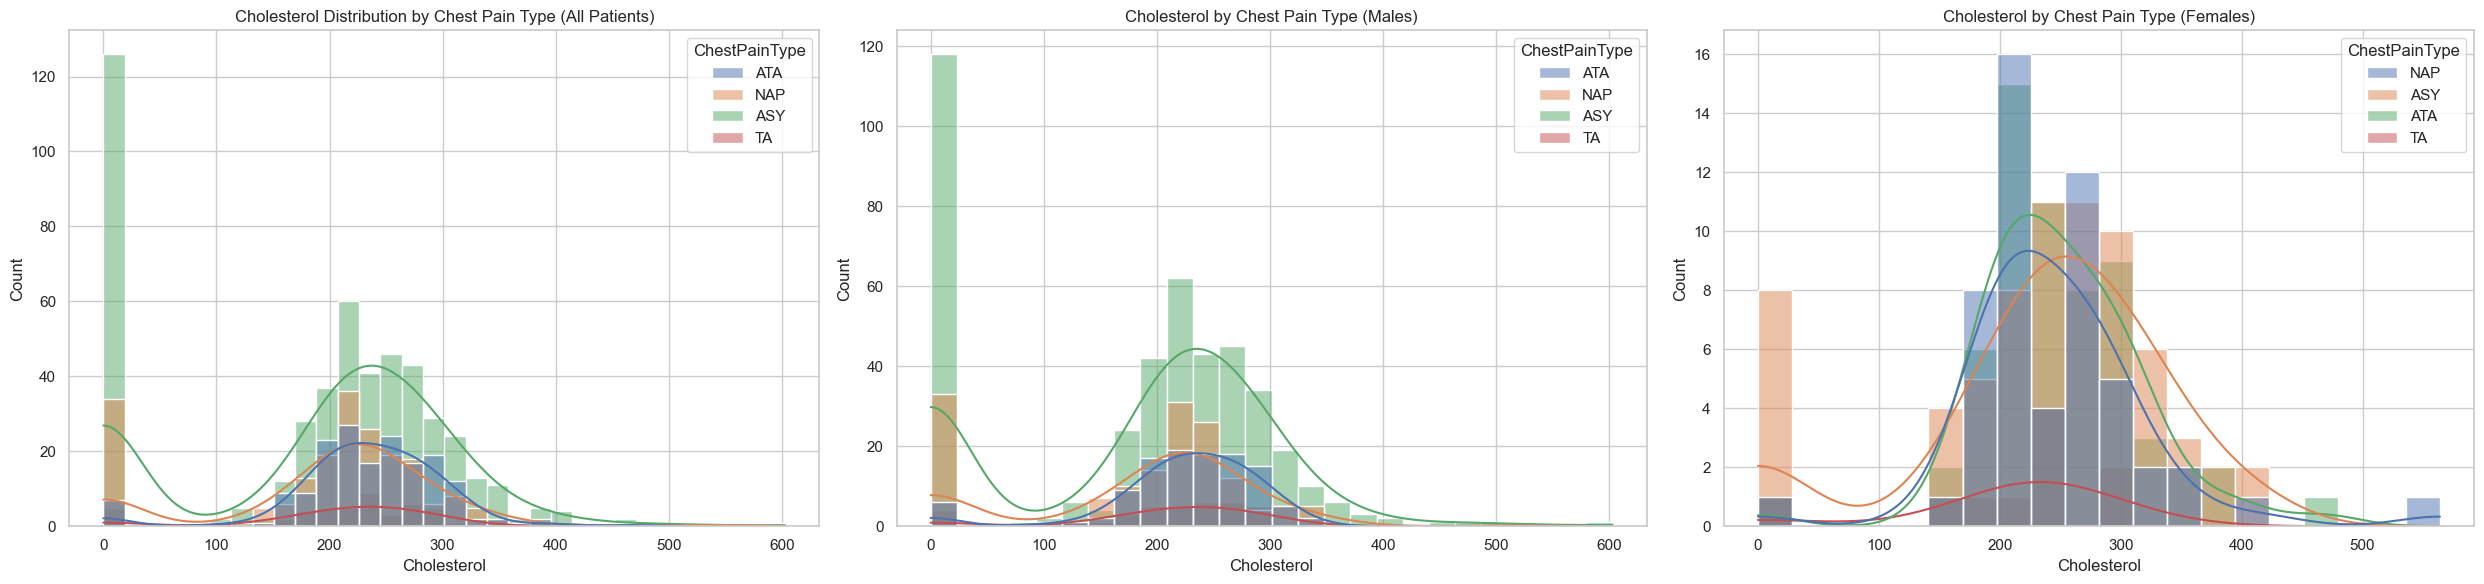

In [8]:
plt.subplots(1, 3, figsize=(25, 6))

# Plot 1: Overall Cholesterol by Chest Pain Type
plt.subplot(131)
sns.histplot(data=df, x='Cholesterol', kde=True, hue='ChestPainType')
plt.title("Cholesterol Distribution by Chest Pain Type (All Patients)")

# Plot 2: Cholesterol by Chest Pain Type (Males)
plt.subplot(132)
sns.histplot(data=df[df.Sex == 'M'], x='Cholesterol', kde=True, hue='ChestPainType')
plt.title("Cholesterol by Chest Pain Type (Males)")

# Plot 3: Cholesterol by Chest Pain Type (Females)
plt.subplot(133)
sns.histplot(data=df[df.Sex == 'F'], x='Cholesterol', kde=True, hue='ChestPainType')
plt.title("Cholesterol by Chest Pain Type (Females)")

plt.tight_layout()
plt.show()


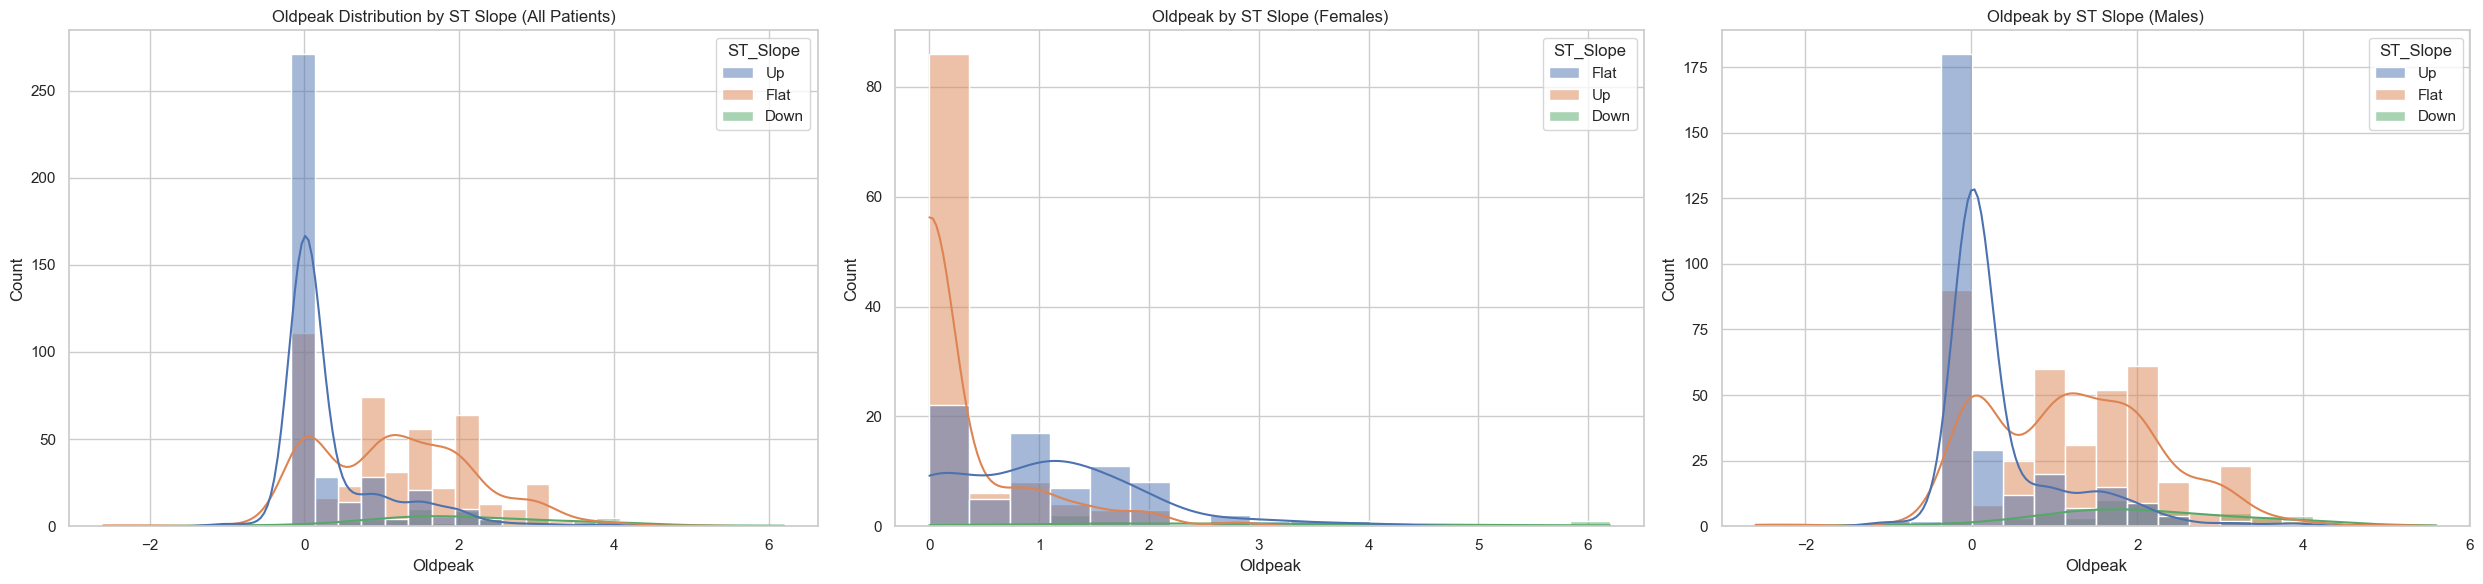

In [9]:
plt.subplots(1, 3, figsize=(25, 6))

# Plot 1: Overall Oldpeak by ST_Slope
plt.subplot(131)
sns.histplot(data=df, x='Oldpeak', kde=True, hue='ST_Slope')
plt.title("Oldpeak Distribution by ST Slope (All Patients)")

# Plot 2: Oldpeak by ST_Slope (Females)
plt.subplot(132)
sns.histplot(data=df[df.Sex == 'F'], x='Oldpeak', kde=True, hue='ST_Slope')
plt.title("Oldpeak by ST Slope (Females)")

# Plot 3: Oldpeak by ST_Slope (Males)
plt.subplot(133)
sns.histplot(data=df[df.Sex == 'M'], x='Oldpeak', kde=True, hue='ST_Slope')
plt.title("Oldpeak by ST Slope (Males)")

plt.tight_layout()
plt.show()


#### 4.2 Multivariate analysis using pieplot

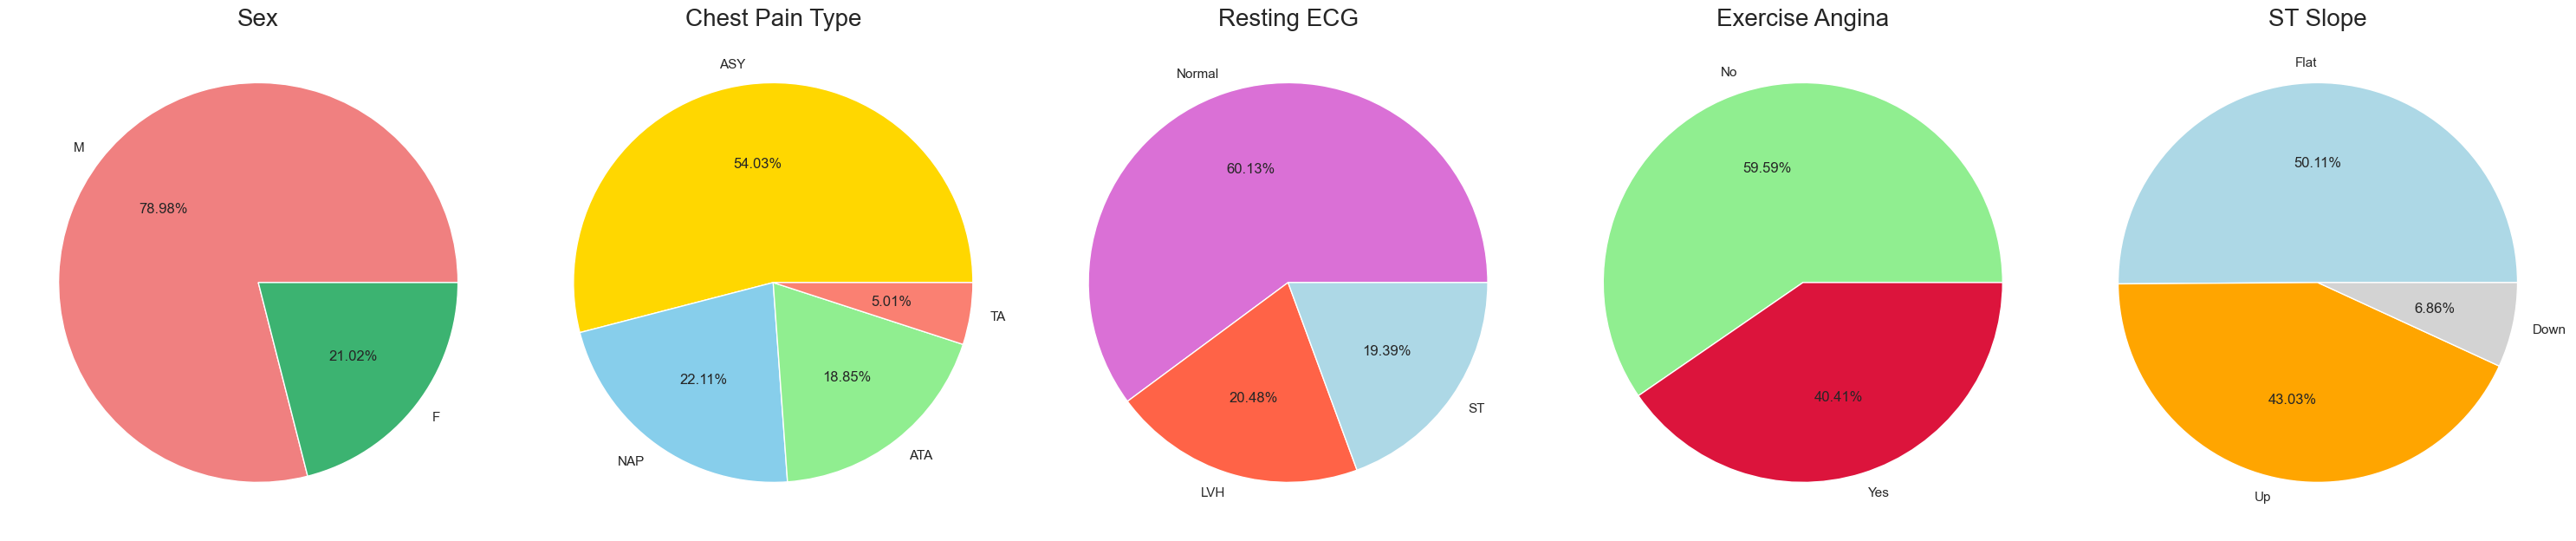

In [10]:
plt.rcParams['figure.figsize'] = (30, 12)

# Plot 1: Sex Distribution
plt.subplot(1, 5, 1)
size = df['Sex'].value_counts()
labels = size.index
colors = ['lightcoral', 'mediumseagreen']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Sex', fontsize=20)
plt.axis('off')

# Plot 2: Chest Pain Type Distribution
plt.subplot(1, 5, 2)
size = df['ChestPainType'].value_counts()
labels = size.index
colors = ['gold', 'skyblue', 'lightgreen', 'salmon']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Chest Pain Type', fontsize=20)
plt.axis('off')

# Plot 3: Resting ECG Results
plt.subplot(1, 5, 3)
size = df['RestingECG'].value_counts()
labels = size.index
colors = ['orchid', 'tomato', 'lightblue']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Resting ECG', fontsize=20)
plt.axis('off')

# Plot 4: Exercise-Induced Angina
plt.subplot(1, 5, 4)
size = df['ExerciseAngina'].value_counts()
labels = ['No', 'Yes']
colors = ['lightgreen', 'crimson']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Exercise Angina', fontsize=20)
plt.axis('off')

# Plot 5: ST Slope
plt.subplot(1, 5, 5)
size = df['ST_Slope'].value_counts()
labels = size.index
colors = ['lightblue', 'orange', 'lightgrey']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('ST Slope', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


#### 4.3 Feature Wise Visualization
#### 4.3.1 Sex COLUMN
- How is distribution of Gender ?
- Is gender has any impact on Heart Desease?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

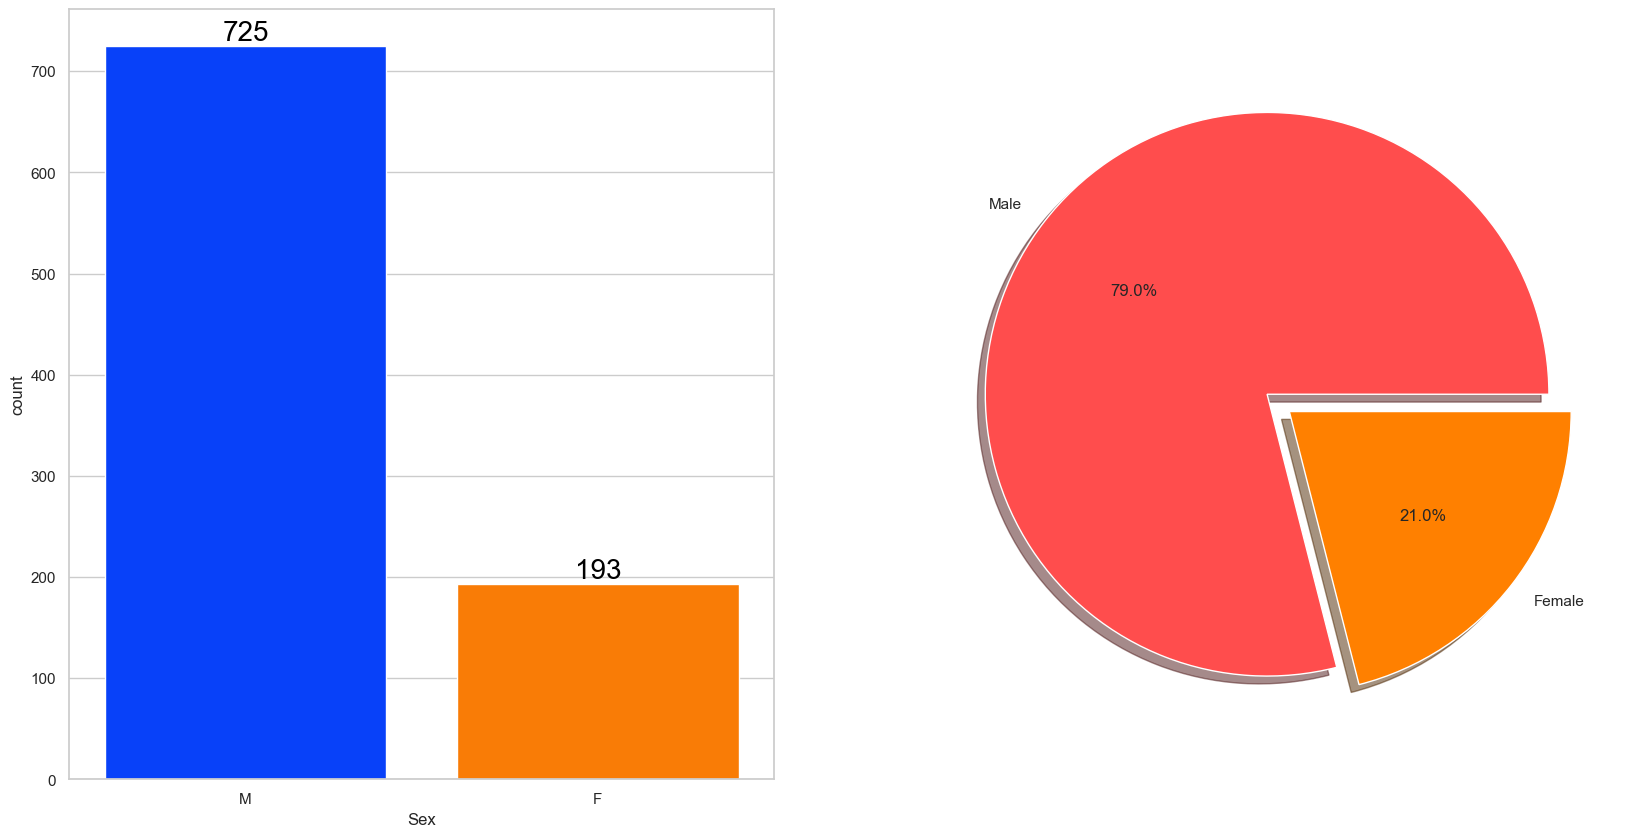

In [12]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Sex'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Sex'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### BIVARIATE ANALYSIS (has gender any impact on Heart Desease ?) 

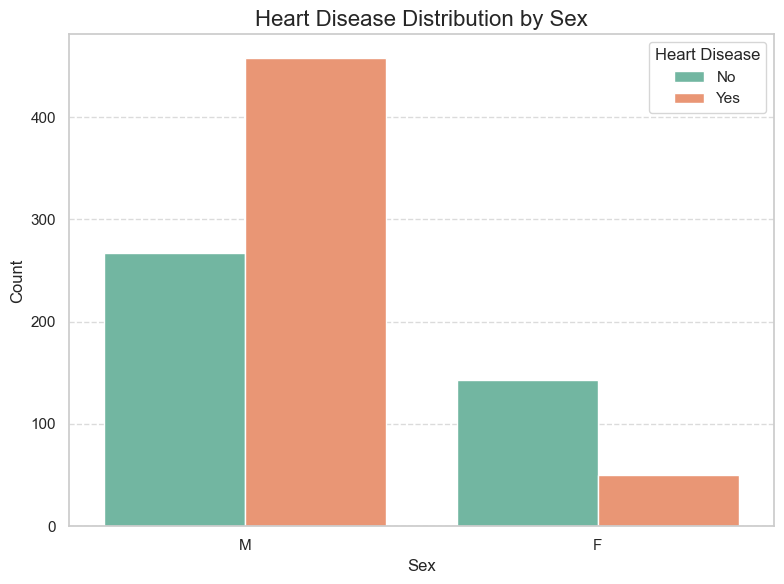

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='HeartDisease', data=df, palette='Set2')

plt.title('Heart Disease Distribution by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 4.3.2 ChestPainType COLUMN
- How is distribution of ChestPainType ?
- Is ChestPainType has any impact on Heart Desease?

#### UNIVARIATE ANALYSIS ( How is ChestPainType wise distribution ?)

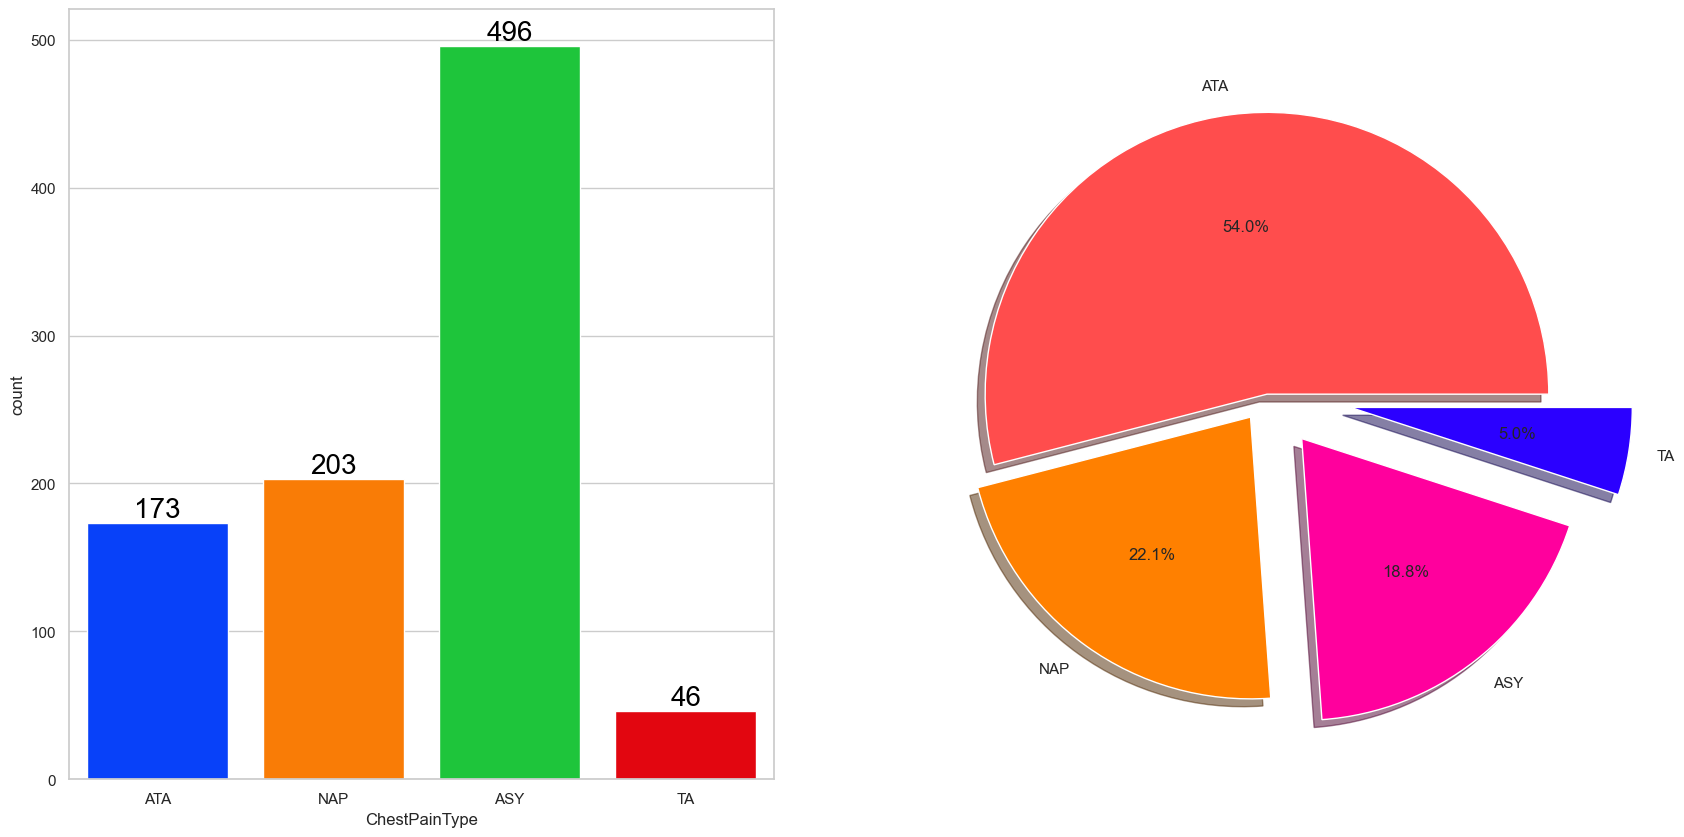

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['ChestPainType'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['ChestPainType'].value_counts(),labels=['ATA','NAP','ASY','TA'],explode=[0,0.1,0.2,0.3],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff009dff','#2b00ffff'])
plt.show()

#### BIVARIATE ANALYSIS (has ChestPainType any impact on Heart Desease ?)

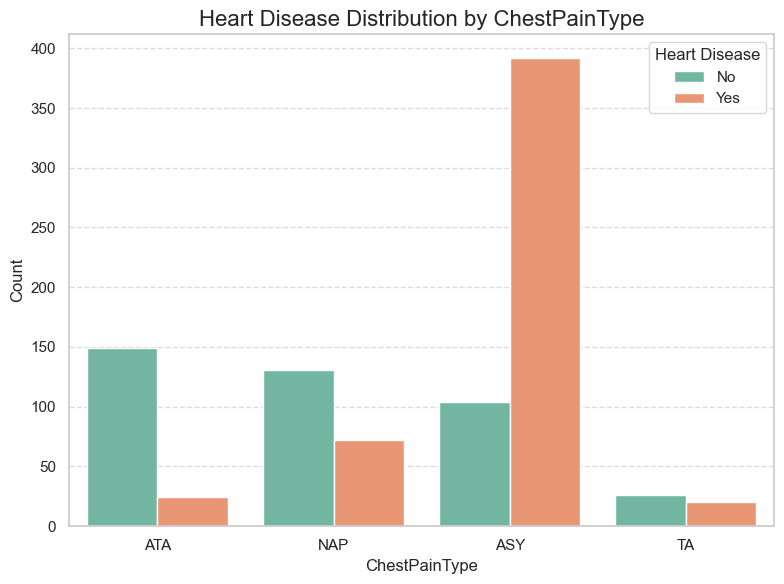

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='Set2')

plt.title('Heart Disease Distribution by ChestPainType', fontsize=16)
plt.xlabel('ChestPainType', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 4.3.3 RestingECG Report COLUMN
- What is RestingECG report of patient ?
- has RestingECG any impact on Heart Desease?

#### UNIVARIATE ANALYSIS ( How is distribution of RestingECG ? )

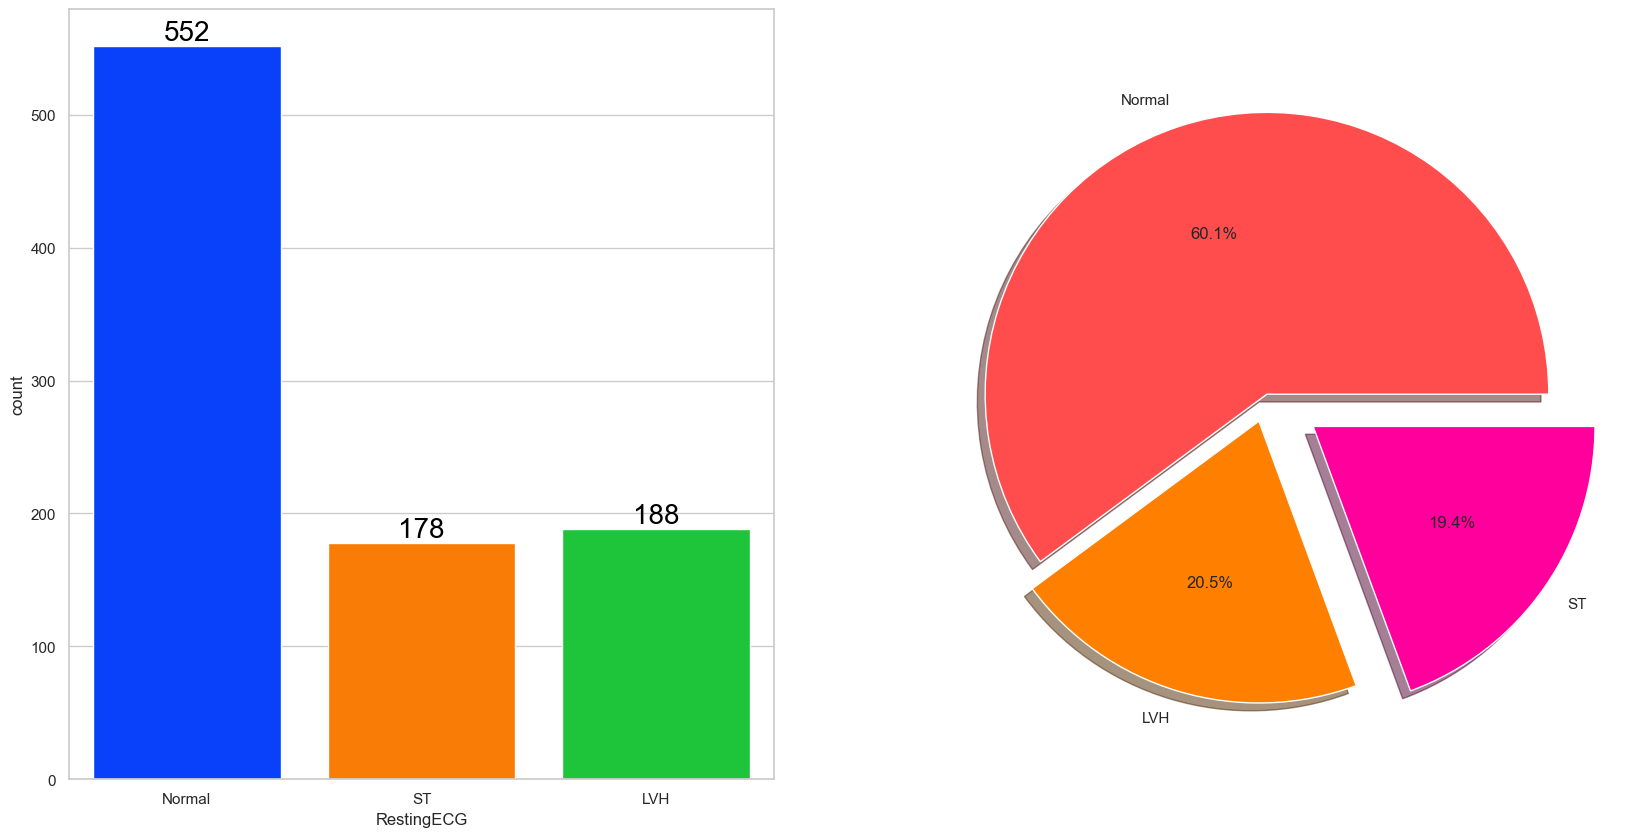

In [37]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['RestingECG'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['RestingECG'].value_counts(),labels=['Normal','LVH','ST'],explode=[0,0.1,0.2],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff009dff'])
plt.show()

#### BIVARIATE ANALYSIS (has RestingECG any impact on Heart Desease ?) 

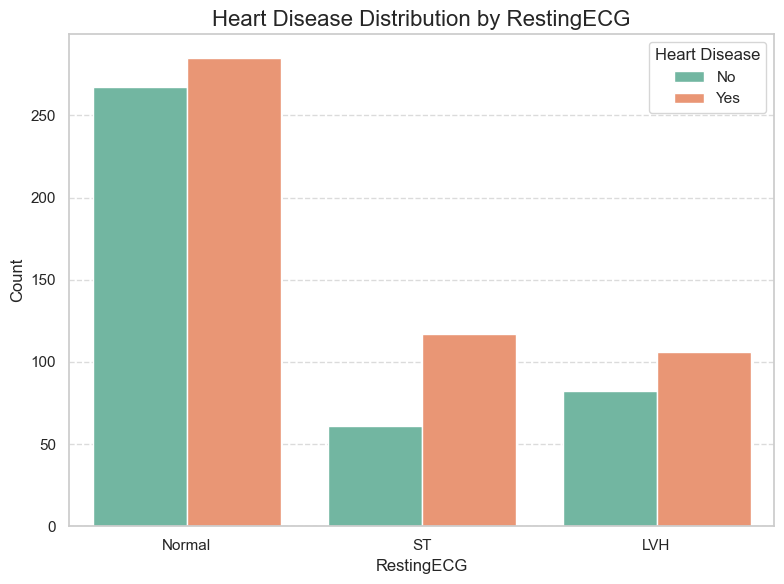

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='RestingECG', hue='HeartDisease', data=df, palette='Set2')

plt.title('Heart Disease Distribution by RestingECG', fontsize=16)
plt.xlabel('RestingECG', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 4.3.4 ExerciseAngina COLUMN
- What is ExerciseAngina of patient ?
- has ExerciseAngina impact on Heart Desease?

#### UNIVARIATE ANALYSIS ( How is distribution of ExerciseAngina ? )

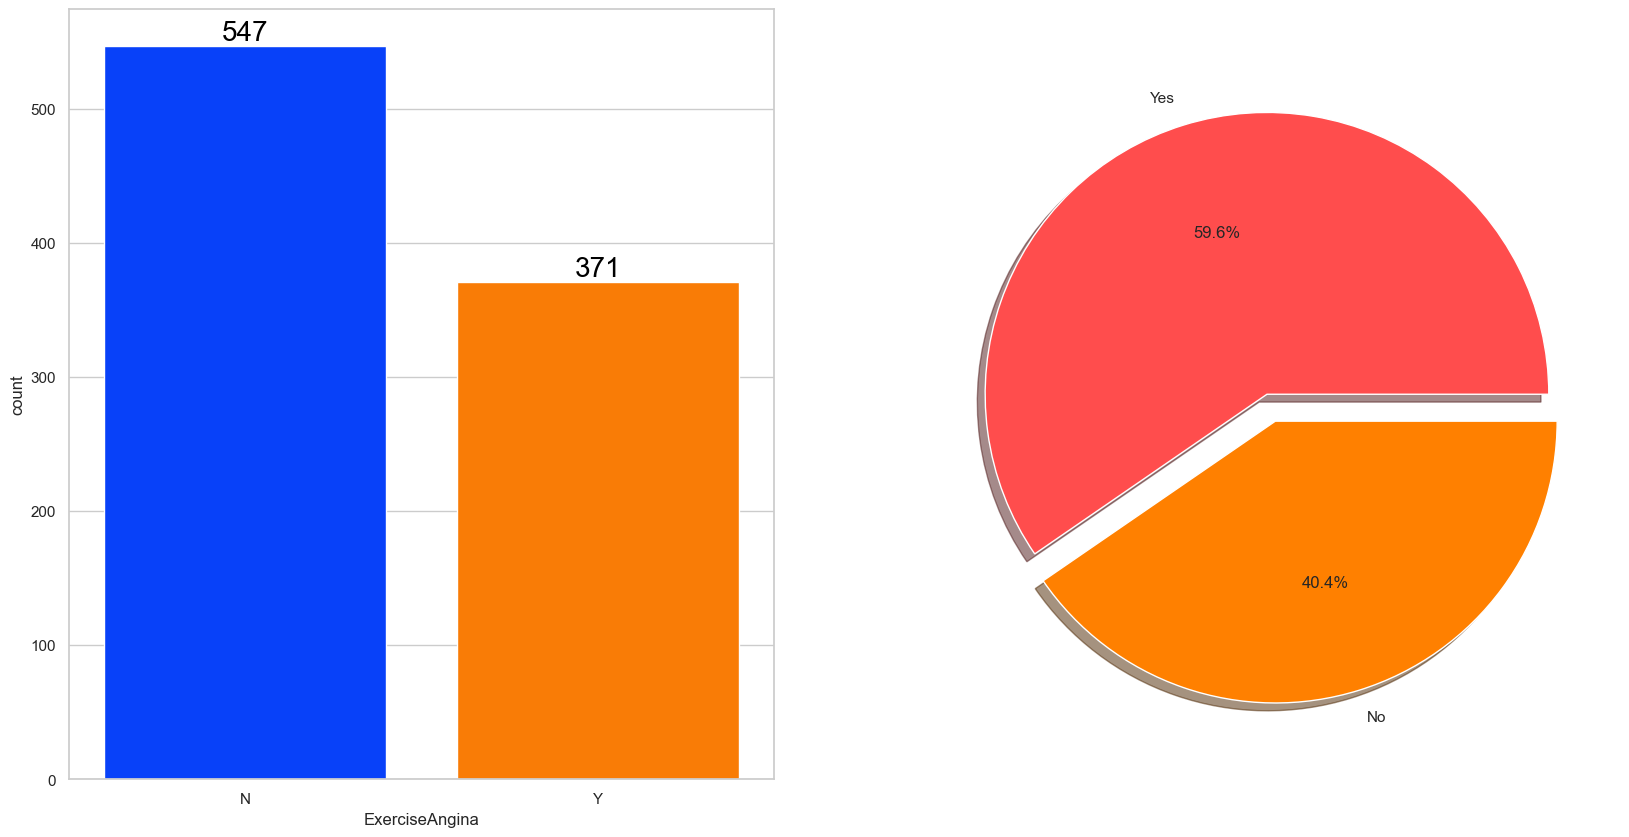

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['ExerciseAngina'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['ExerciseAngina'].value_counts(),labels=['Yes','No',],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### BIVARIATE ANALYSIS (has ExerciseAngina any impact on Heart Desease ?) 

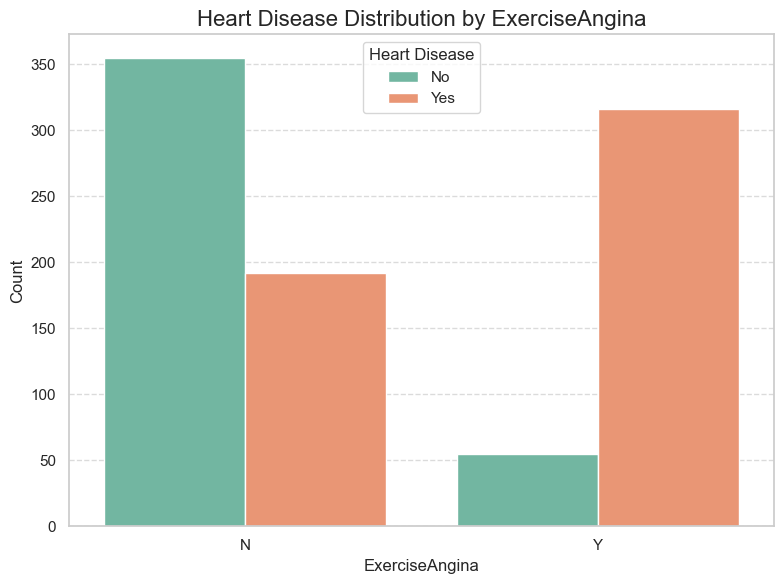

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, palette='Set2')

plt.title('Heart Disease Distribution by ExerciseAngina', fontsize=16)
plt.xlabel('ExerciseAngina', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 4.3.5 ST_Slope COLUMN
- What is ST_Slope of patient ?
- has ST_Slope impact on Heart Desease?

#### UNIVARIATE ANALYSIS ( How is distribution of ST_Slope ? )

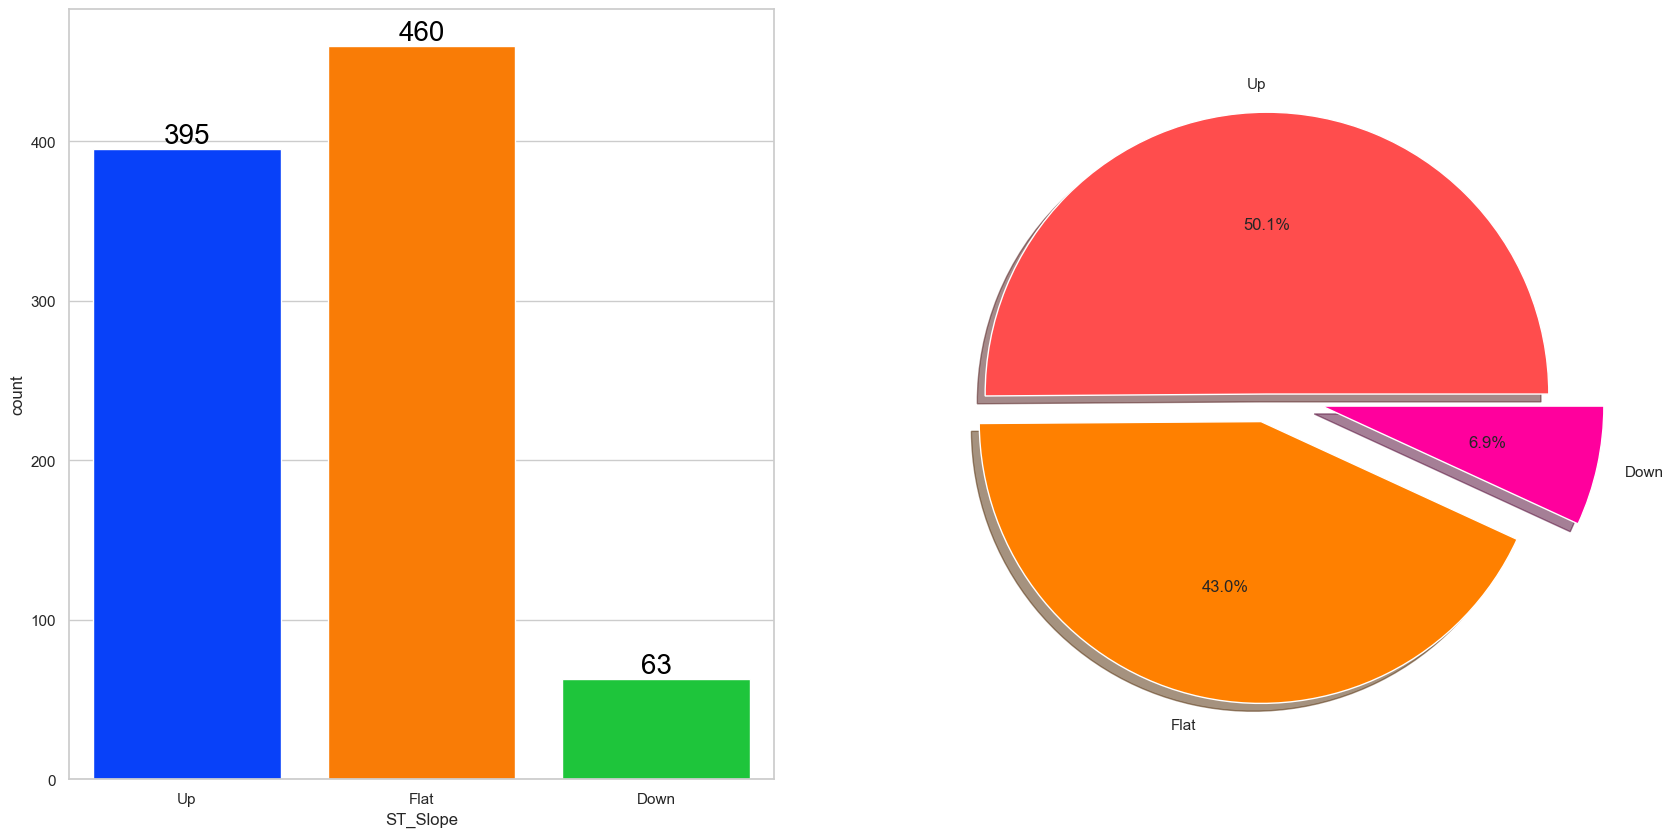

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['ST_Slope'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['ST_Slope'].value_counts(),labels=['Up','Flat','Down'],explode=[0,0.1,0.2],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff009dff'])
plt.show()

#### BIVARIATE ANALYSIS (has ST_Slope any impact on Heart Desease ?) 

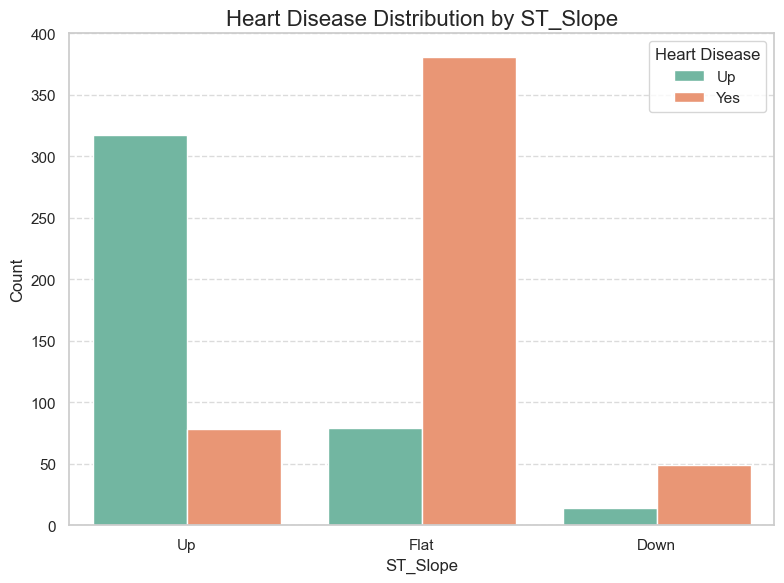

In [40]:

plt.figure(figsize=(8, 6))
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df, palette='Set2')

plt.title('Heart Disease Distribution by ST_Slope', fontsize=16)
plt.xlabel('ST_Slope', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease', labels=['Up', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 4.3.6 CHECKING OUTLIERS

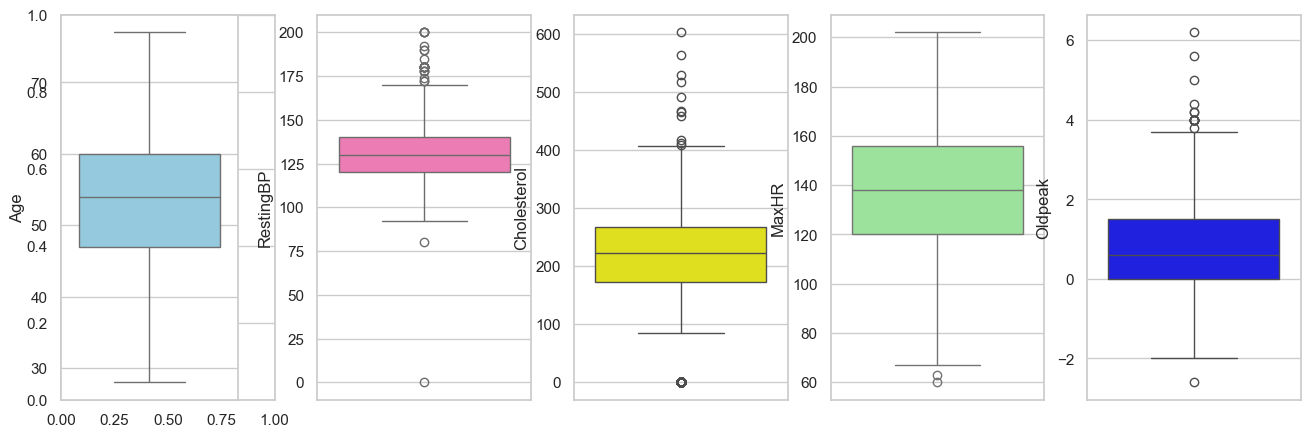

In [50]:
plt.subplots(1,5,figsize=(16,5))
plt.subplot(161)
sns.boxplot(df['Age'],color='skyblue')
plt.subplot(152)
sns.boxplot(df['RestingBP'],color='hotpink')
plt.subplot(153)
sns.boxplot(df['Cholesterol'],color='yellow')
plt.subplot(154)
sns.boxplot(df['MaxHR'],color='lightgreen')
plt.subplot(155)
sns.boxplot(df['Oldpeak'],color='blue')
plt.show()

#### 4.3.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

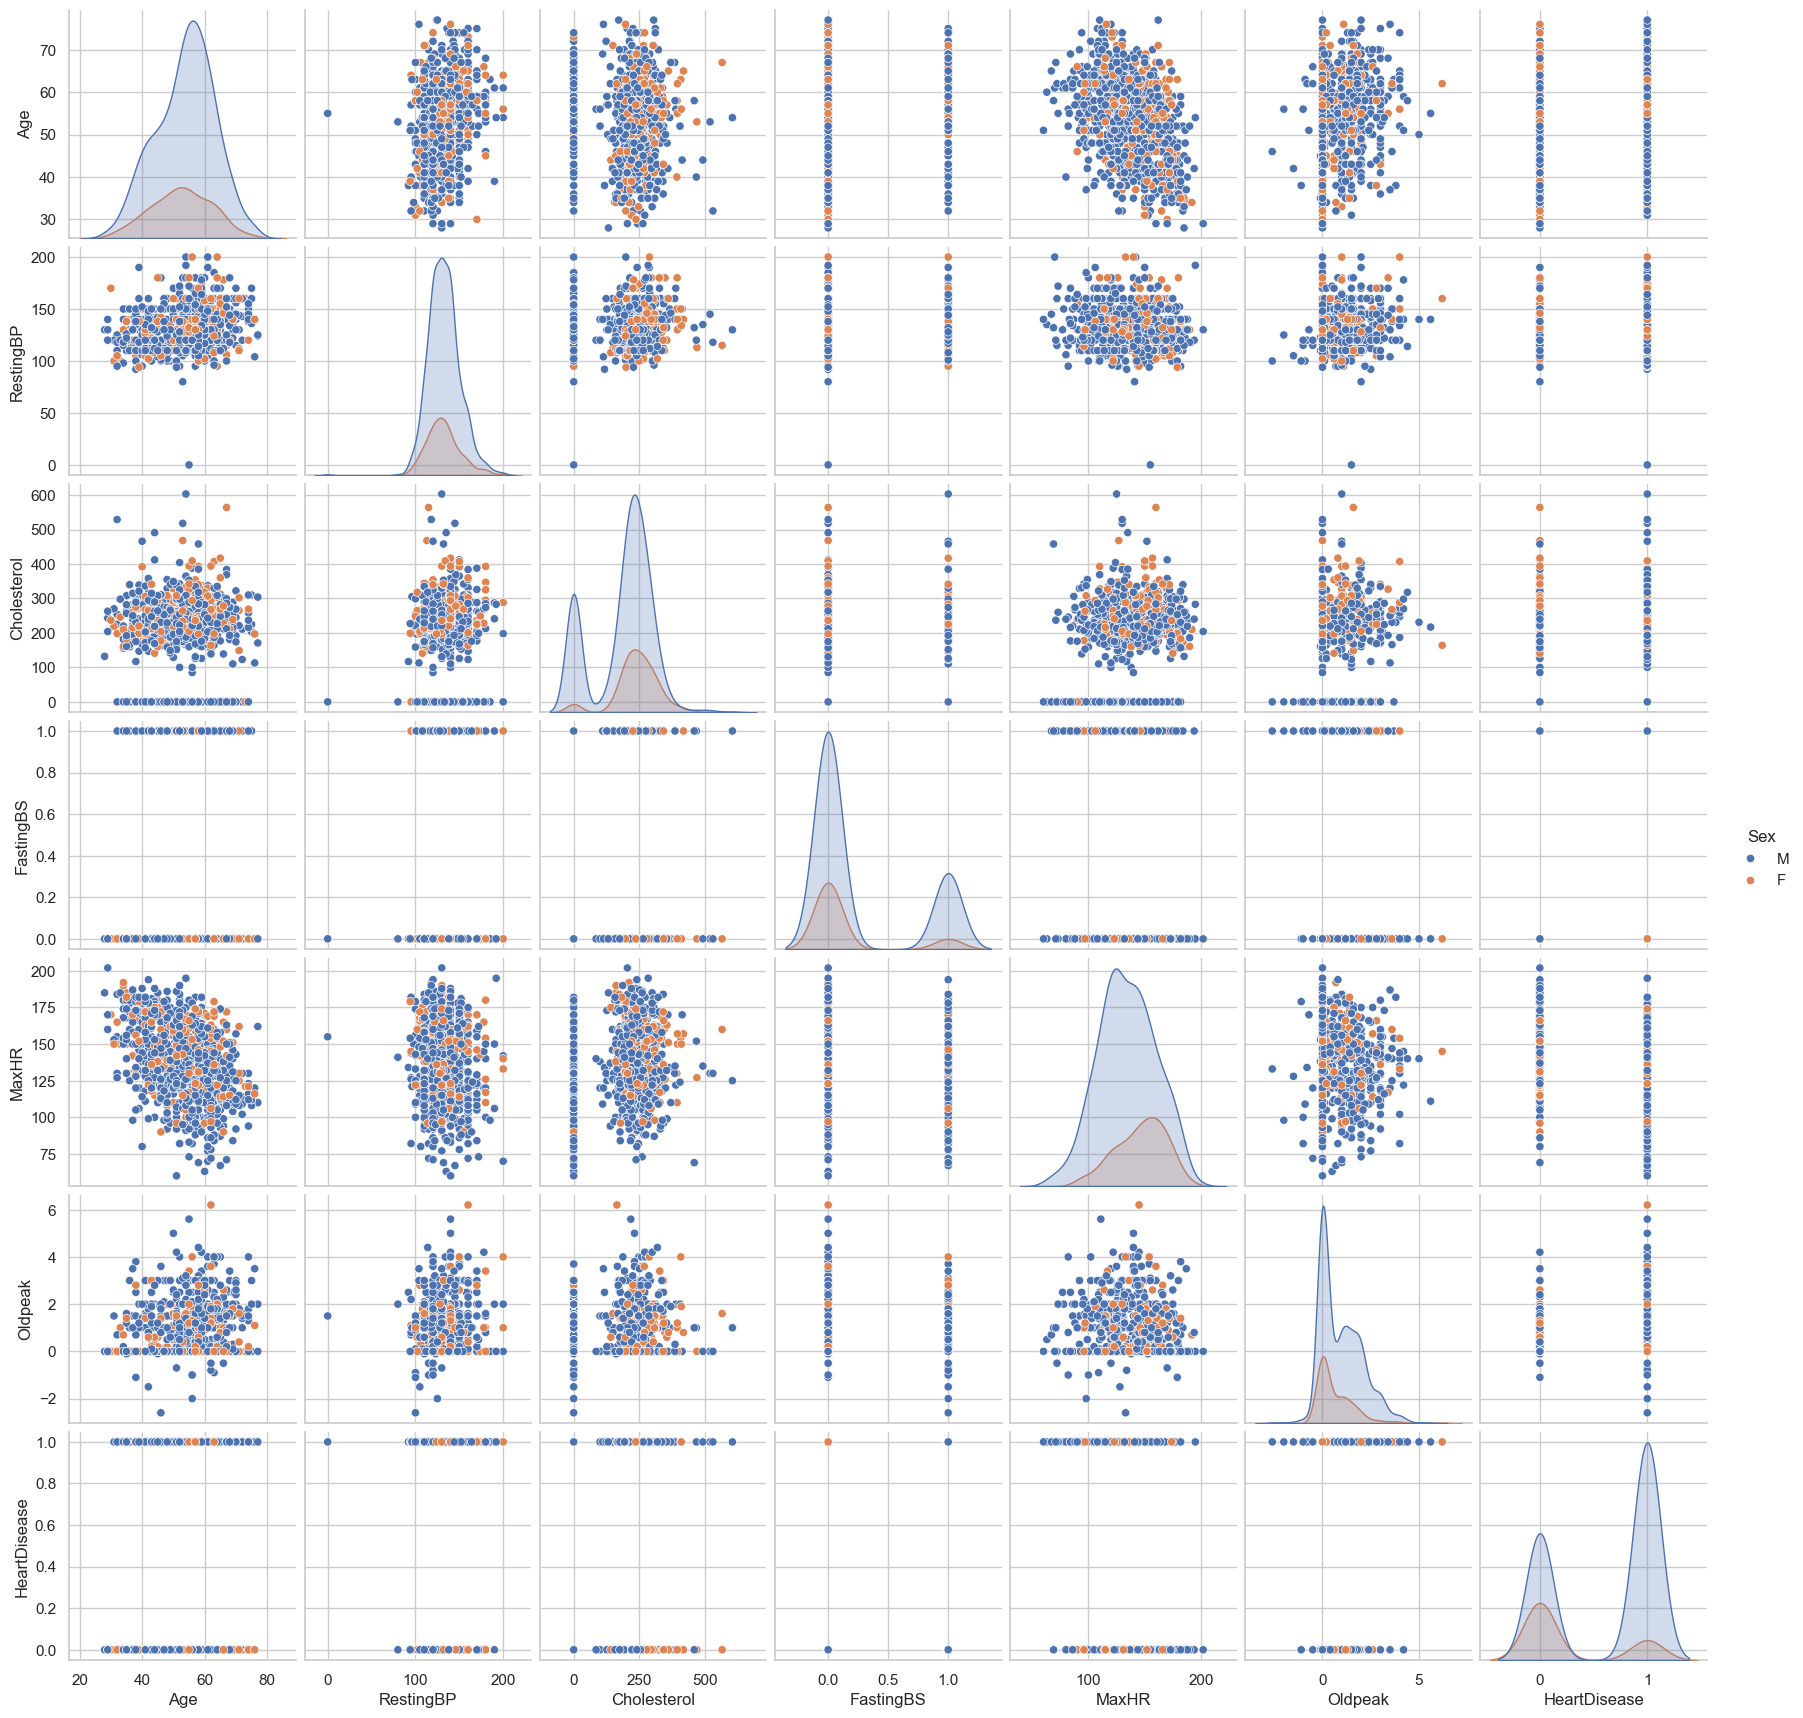

In [51]:
sns.pairplot(df,hue = 'Sex')
plt.show()

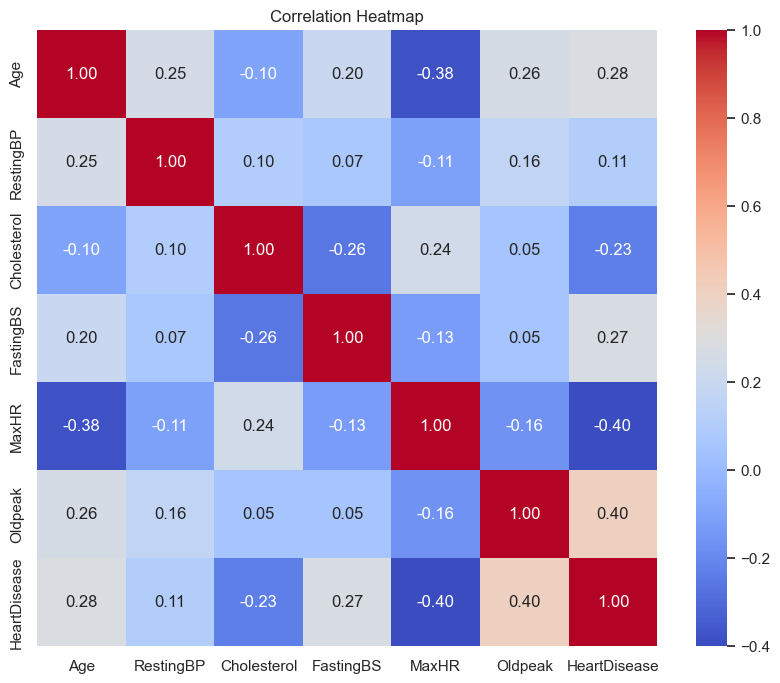

In [16]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### 5. Conclusions
- Individuals with lower MaxHR are more likely to have heart disease, making it a strong negative predictor.

- Higher Oldpeak values are strongly associated with the presence of heart disease.

- Fasting blood sugar shows a mild correlation with heart disease but may not be a standalone predictor.

- Cholesterol and RestingBP do not show clear separation between heart disease classes, limiting their individual predictive power.

- Gender differences exist subtly, with males appearing slightly more prone to heart disease in the dataset.